# Homework 4 Part 2

**Due: Monday, November 9, 11:59 PM**

* This is a group assignment (final project team group).

# Create Your Repository

Create the repo for this assignment by visiting the following link:

https://classroom.github.com/g/m2K_Ea-V

# Data Set

In this assignment, you will be working with the [training data set for the final project](https://ufl.instructure.com/courses/404363/files/folder/Final%20Project/Training%20Data):

* *data_training.npy*
* *labels_training.npy*

**In this homework, you are allowed to use *any* libraries.**

# Computing Resources

Make full use of the computing resources in the [HiPerGator](https://help.rc.ufl.edu/doc/UFRC_Help_and_Documentation).

* Our group is called **"eee4773"**.
* Refer to the lecture recording from Monday, November 2, for information on how to use the HiPerGator.

An alternative is to use the public GPU/TPU resources from [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).

# Communication

Make sure you communicate often with your team, and you are all following your work plan. You can schedule Zoom meetings using your UFL account: https://ufl.zoom.us/

# Problem 1 (5 points)

Get the team together and discuss rules for working in a group. Design at least 3 rules. 

* I will gather information from all groups and share the consensus group rules.
* For the final project submission (code implementation and report), we will use these group rules as a weight contribution for each team member.
    * For example, suppose that the average score (includes peer- and self-evaluation according to the rules) is 90%, than your individual project grade will be $0.90 \times \text{final project grade}$.
    * All fully contributing members, should expect to get 100% on the participation weight score.


### The three consensus rules for working in a group that our team discussed are as follows:
* Good communication
* Completing work on time
* Completing work of good quality


# Problem 2 (10 points)

In a standard supervised Machine Learning algorithm, we typically extract features from data and utilize those features to train a model.

In this problem, you will be exploring the data set and extracting features from the audio signals. A popular feature for speech signals is the Mel Frequency Cepstral Coefficient (MFCC).

**Design at least 2 features.** Compute these features for the training data and build your feature matrix.

* Tip: ```librosa``` continues a few tools to extract features from audio, though it is not required for use in this problem.

(Note: there are multiple solutions to this problem. Grading will be based on critical reasoning and code implementation.)

In [1]:
import numpy as np
import numpy.random as npr
import random
import librosa
from IPython.display import display, Audio

ModuleNotFoundError: No module named 'librosa'

In [2]:
data_training = np.load('data_training.npy')
labels_training = np.load('labels_training.npy')
statements_training = np.load('statements_training.npy')

In [3]:
# [4,2]
training_labels_combined = []
for i in range(len(labels_training)):
    training_labels_combined.append([labels_training[i],statements_training[i]])

In [4]:
labels_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprise']

In [5]:
sample_rate = 44000

In [6]:
mfccs = []
for x in data_training:
    mfccs.append(librosa.feature.mfcc(y=x,sr=sample_rate))

In [7]:
mfccs2D = []
for x in mfccs:
    mfccs2D.append(np.mean(x,axis=0))

In [8]:
zeroCrossRates = []
for x in data_training:
    zeroCrossRates.append(librosa.feature.zero_crossing_rate(x))

In [9]:
zeroCrossRates2D = []
for x in zeroCrossRates:
    zeroCrossRates2D.append(zeroCrossRates[i][0])

In [10]:
combinedFeatures = []
for i in range(len(mfccs2D)):
    combinedFeatures.append(np.concatenate((mfccs2D[i],zeroCrossRates2D[i]),axis=0))

# Problem 3 (30 points)

Implement the $k$-NN and SVM classifiers on your training data. You can choose to apply the classifiers:
* directly on the input data,
* using the features you designed in problem 1,
* both input space and feature space, as to compare both performances.

In your implementation, you should follow the standard procedures:
1. Pre-processing the data, this includes data normalization.
2. Split data into training and test sets. Make sure you use the same training set in both classifiers.
3. Perform $k$-fold Cross-Validation to determine the best set of parameters for each classifier. Consider using the [```GridSearchCV```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) approach in experimental design.
4. Report the results on the test set using appropriate evaluation metrics.
5. Include a paragraph that compares the performance of both classifiers, and steps you will take to improve upon these preliminary results.

Note: You may include a paragraph description about your experience in using the HiPerGator. If you encounter any issues, please describe them.

### K nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(mfccs2D, training_labels_combined, test_size=0.30)
# X_train, X_test, y_train, y_test = train_test_split(zeroCrossRates2D, training_labels_combined, test_size=0.30)
# X_train, X_test, y_train, y_test = train_test_split(mfccs, statements_training, test_size=0.30)
X_train, X_test, y_train, y_test = train_test_split(combinedFeatures, training_labels_combined, test_size=0.30)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
# KNN with multiclass
from sklearn.multioutput import MultiOutputClassifier
def predict(trainX,trainY,predX,k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    pred_yp_knn = classifier.fit(trainX,trainY).predict(predX)
    return pred_yp_knn

In [42]:
scoresEmotion = []
scoresStatement = []
folds = 4
maxKNeighbors = 20
for n in range(1,maxKNeighbors+1):
    sum_accuracyEmotion,sum_accuracyStatement = 0,0
    for train_index, test_index in KFold(n_splits=folds).split(X_train):
        X_train_k = X_train[train_index]
        y_train_k = y_train[train_index]
        X_test_k = X_train[test_index]
        y_test_k = y_train[test_index]
        sum_accuracyEmotion += accuracy_score(y_test_k[:,0], predict(X_train_k,y_train_k,X_test_k,k=n)[:,0])
        sum_accuracyStatement += accuracy_score(y_test_k[:,1], predict(X_train_k,y_train_k,X_test_k,k=n)[:,1])
    scoresEmotion.append(sum_accuracyEmotion/folds)
    scoresStatement.append(sum_accuracyStatement/folds)

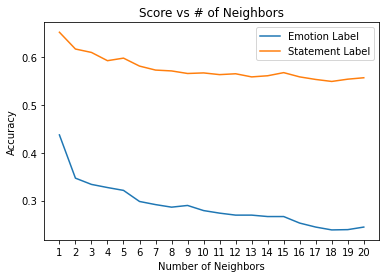

In [48]:
from matplotlib import pyplot as plt
xRange = np.arange(1,maxKNeighbors+1)
plt.title("Score vs # of Neighbors") 
plt.xlabel("Number of Neighbors") 
plt.ylabel("Accuracy")
plt.plot(xRange,scoresEmotion,label="Emotion Label")
plt.plot(xRange,scoresStatement,label="Statement Label")
plt.xticks(range(1,maxKNeighbors+1))
plt.legend()

In [53]:
Knn_1neighbor = predict(X_train,y_train,X_test,k=1)
Knn_1neighbor_Emotion = accuracy_score(y_test[:,0],Knn_1neighbor[:,0])
Knn_1neighbor_Statement = accuracy_score(y_test[:,1],Knn_1neighbor[:,1])
print("Emotion Score",Knn_1neighbor_Emotion,"and Statement Score is",Knn_1neighbor_Statement)

Emotion Score 0.475 and Statement Score is 0.6888888888888889


### SVM

In [17]:
from sklearn import svm

In [93]:
folds = 4
# C_range = np.arange(0,10000,1000)
scoresEmotion = []
scoresStatement = []
C_range = np.logspace(start=-2, stop=3, num=10, endpoint=True)
print(C_range)
for c in C_range:
    print(c)
    clf = svm.SVC(C=c)
    classifier = MultiOutputClassifier(clf, n_jobs=-1)
    sum_accuracyEmotion,sum_accuracyStatement = 0,0
    for train_index, test_index in KFold(n_splits=folds).split(X_train):
        X_train_k = X_train[train_index]
        y_train_k = y_train[train_index]
        X_test_k = X_train[test_index]
        y_test_k = y_train[test_index]
        SVMPred = classifier.fit(X_train_k, y_train_k).predict(X_test_k)
        sum_accuracyEmotion += accuracy_score(y_test_k[:,0], SVMPred[:,0])
        sum_accuracyStatement += accuracy_score(y_test_k[:,1], SVMPred[:,1])
    scoresEmotion.append(sum_accuracyEmotion/folds)
    scoresStatement.append(sum_accuracyStatement/folds)

[1.00000000e-02 3.59381366e-02 1.29154967e-01 4.64158883e-01
 1.66810054e+00 5.99484250e+00 2.15443469e+01 7.74263683e+01
 2.78255940e+02 1.00000000e+03]
0.01
0.03593813663804628
0.1291549665014884
0.464158883361278
1.6681005372000592
5.994842503189409
21.544346900318846
77.42636826811278
278.2559402207126
1000.0


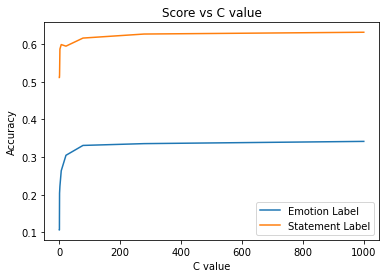

In [96]:
plt.title("Score vs C value") 
plt.xlabel("C value") 
plt.ylabel("Accuracy")
plt.plot(C_range,scoresEmotion,label="Emotion Label")
plt.plot(C_range,scoresStatement,label="Statement Label")
# plt.xticks(range(1,maxKNeighbors+1))
plt.legend()

In [98]:
# Test set SVM
clf = svm.SVC(C=80)
classifier = MultiOutputClassifier(clf, n_jobs=-1)
SVMPred = classifier.fit(X_train, y_train).predict(X_test)
accuracyEmotion = accuracy_score(y_test[:,0], SVMPred[:,0])
accuracyStatement = accuracy_score(y_test[:,1], SVMPred[:,1])
print("Test Set - \n","Emotion Score",accuracyEmotion,"and Statement Score is",accuracyStatement)

Test Set - 
 Emotion Score 0.3611111111111111 and Statement Score is 0.6652777777777777


### Conclusion
Because we are only using two features (ZeroCrossRate and MFCC) and simple classificiation algorithms (KNN and SVM) our scores are pretty low. Our KNN classifier is much better at predicting the statement (0 or 1) and the label than SVM is. Though even at this moment, our results show promise as our label predictions are usually in the range of 2 to 4 times better than pure random (1/8 or .125).

### HiperGator
Hipergator was really useful and cut computation times by a lot. A lot of team members weren't even able to load in the training set on our personal computers because of the sheer size of the data. There were occasional slow points during use (even simple printing a size of an array) took minutes to run but other times they even heavier computations took less than a few seconds so that was a weird glitch.